In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [127]:
application_train = pd.read_csv('datasets/application_train.csv')
POS_CASH_balance = pd.read_csv('datasets/POS_CASH_balance.csv')
bureau = pd.read_csv('datasets/bureau.csv')
bureau_balance = pd.read_csv('datasets/bureau_balance.csv')
credit_card_balance = pd.read_csv('datasets/credit_card_balance.csv')
installments_payments = pd.read_csv('datasets/installments_payments.csv')
previous_application = pd.read_csv('datasets/previous_application.csv')

# Data Preprocessing

## Look at the data

#### application_train

In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

#### POS_CASH_balance

In [23]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


#### bureau

In [24]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


#### bureau_balance

In [25]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


#### credit_card_balance

In [26]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [30]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

#### installments_payments

In [27]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


#### previous_application

In [28]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

## Checking Missing Values

In [40]:
application_train.isna().sum().sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [41]:
# berapa banyak missing values yang kita punya?
total_cells = np.product(application_train.shape)
total_missing = sum(application_train.isna().sum())

# persentase data yg missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.39594190712943


In [42]:
POS_CASH_balance.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [43]:
bureau.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [44]:
bureau_balance.isna().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [46]:
credit_card_balance.isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [47]:
installments_payments.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [48]:
previous_application.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [53]:
application_test.isna().sum().sort_values(ascending=False).head(50)

COMMONAREA_AVG                  33495
COMMONAREA_MODE                 33495
COMMONAREA_MEDI                 33495
NONLIVINGAPARTMENTS_AVG         33347
NONLIVINGAPARTMENTS_MODE        33347
NONLIVINGAPARTMENTS_MEDI        33347
FONDKAPREMONT_MODE              32797
LIVINGAPARTMENTS_AVG            32780
LIVINGAPARTMENTS_MODE           32780
LIVINGAPARTMENTS_MEDI           32780
FLOORSMIN_MEDI                  32466
FLOORSMIN_AVG                   32466
FLOORSMIN_MODE                  32466
OWN_CAR_AGE                     32312
YEARS_BUILD_AVG                 31818
YEARS_BUILD_MEDI                31818
YEARS_BUILD_MODE                31818
LANDAREA_MEDI                   28254
LANDAREA_AVG                    28254
LANDAREA_MODE                   28254
BASEMENTAREA_MEDI               27641
BASEMENTAREA_AVG                27641
BASEMENTAREA_MODE               27641
NONLIVINGAREA_AVG               26084
NONLIVINGAREA_MODE              26084
NONLIVINGAREA_MEDI              26084
ELEVATORS_MO

## Drop Missing Values

In [5]:
application_train.shape

(307511, 122)

In [6]:
application_train_no_null = application_train.dropna(axis=1)
application_train_no_null.shape

(307511, 55)

In [69]:
application_train_no_null.iloc[:, :20]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,1,1


# Exploratory Data Analysis (EDA)

#### TARGET (0: without difficult payment, 1: with difficult payment)

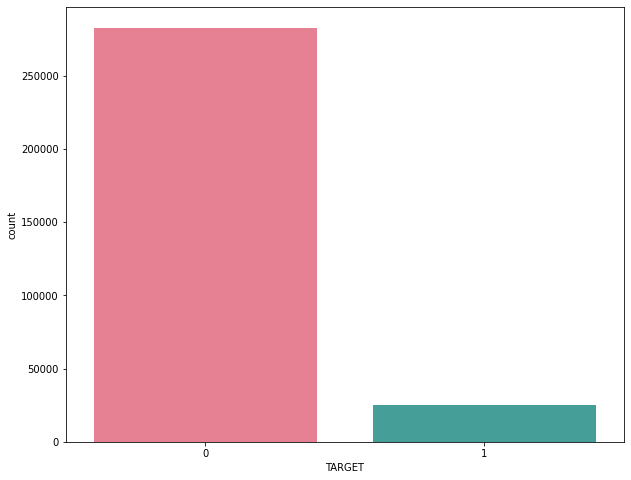

In [218]:
plt.figure(figsize=(10,8))
sns.countplot(x=application_train['TARGET'], palette='husl')
plt.show()

#### Distribution of Amount Income Total

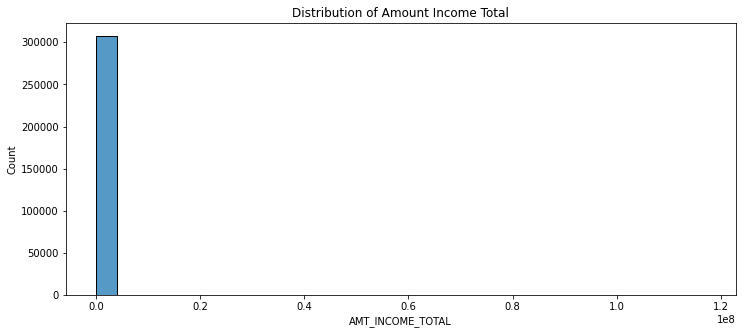

In [216]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Amount Income Total')
sns.histplot(application_train['AMT_INCOME_TOTAL'], bins=30)
plt.show()

#### Distribution of Amount Credit

<AxesSubplot:title={'center':'Distribution of Amount Credit'}, xlabel='AMT_CREDIT', ylabel='Count'>

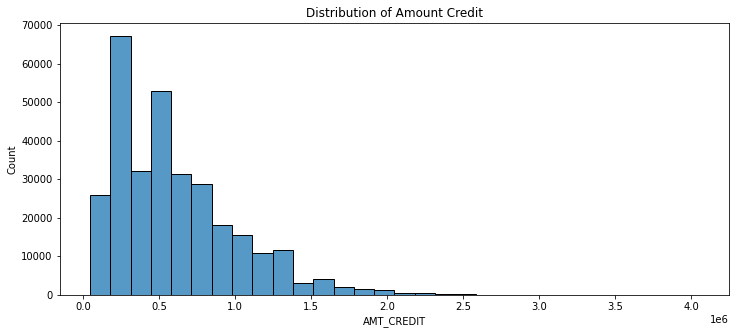

In [215]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Amount Credit')
sns.histplot(application_train['AMT_CREDIT'], bins=30)

#### Distribution of Amount Goods Price

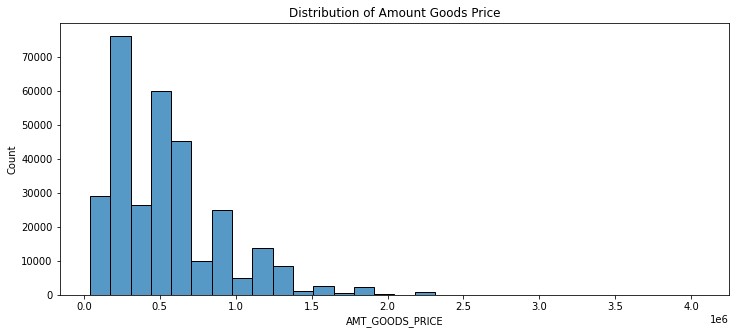

In [220]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Amount Goods Price')
sns.histplot(application_train['AMT_GOODS_PRICE'], bins=30)
plt.show()

#### Distribution of Amount Annuity

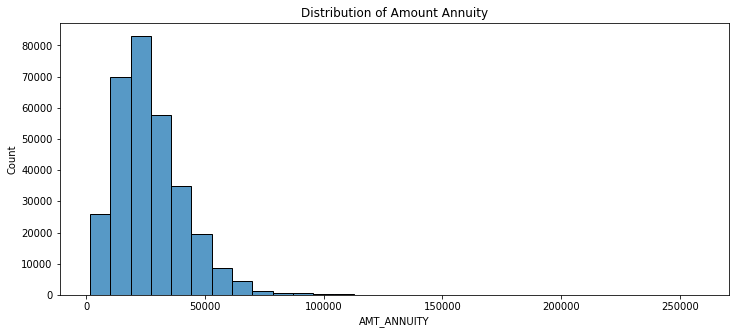

In [221]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Amount Annuity')
sns.histplot(application_train['AMT_ANNUITY'], bins=30)
plt.show()

#### Distribution of Age

In [129]:
application_train['DAYS_BIRTH'] = (application_train['DAYS_BIRTH'] / -365).round()

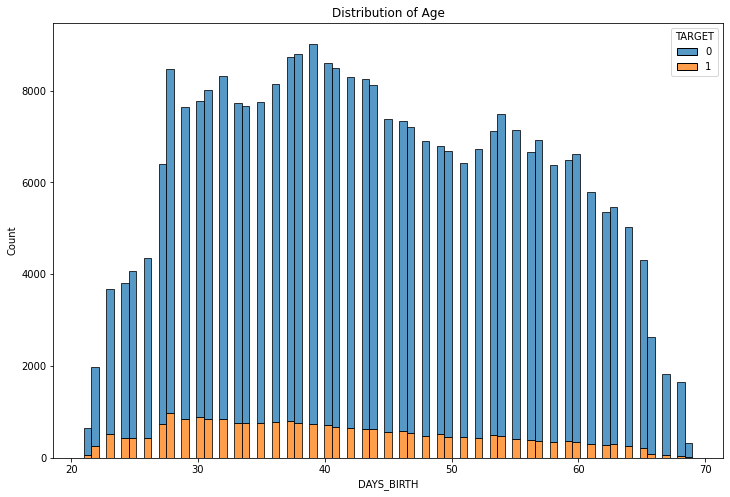

In [224]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Age')
sns.histplot(data=application_train, x='DAYS_BIRTH', hue='TARGET', multiple='stack')
plt.show()

#### Distribution of Name Type Suite

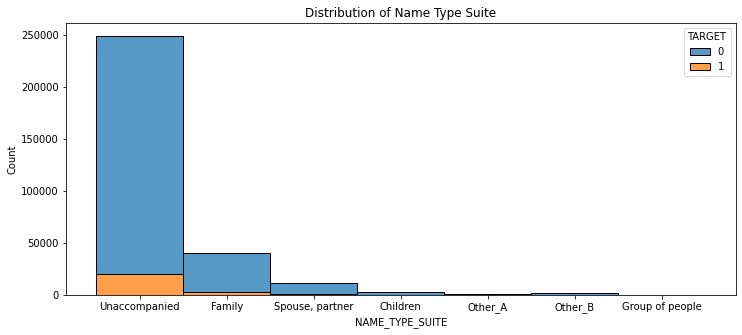

In [222]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Name Type Suite')
sns.histplot(application_train, x='NAME_TYPE_SUITE', hue='TARGET', multiple='stack')
plt.show()

#### Distribution of Name Contract Type

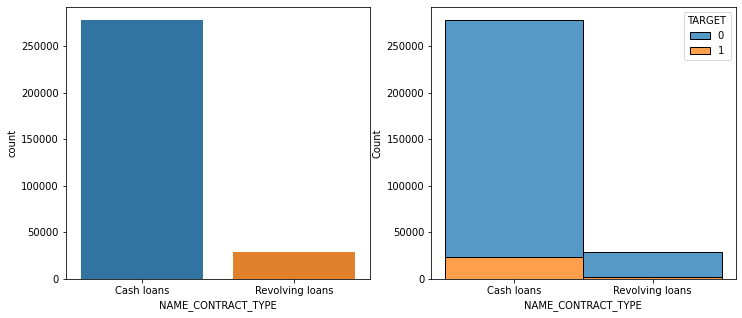

In [233]:
fig, ax = plt.subplots(1,2 , figsize=(12,5))
sns.countplot(x=application_train['NAME_CONTRACT_TYPE'], ax=ax[0])
sns.histplot(application_train, x='NAME_CONTRACT_TYPE', hue='TARGET', multiple='stack', ax=ax[1])
plt.show()

<AxesSubplot:title={'center':'Cash Loans Distribution'}, ylabel='TARGET'>

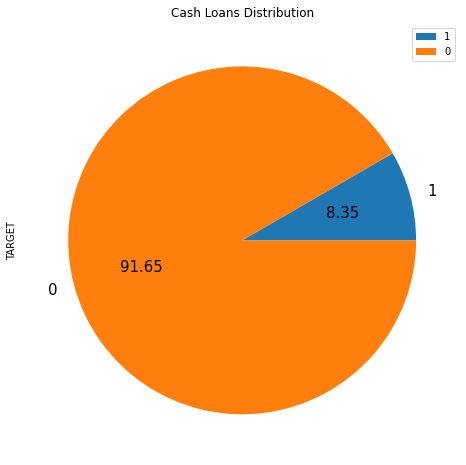

In [52]:
# Cash Loans Distribution
cash_loans = application_train[application_train['NAME_CONTRACT_TYPE'] == 'Cash loans']

cash_loans_target = cash_loans['TARGET']
r = Counter(cash_loans_target)

cash_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
cash_target.columns = ['TARGET']
cash_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Cash Loans Distribution')

<AxesSubplot:title={'center':'Revolving Loans Distribution'}, ylabel='TARGET'>

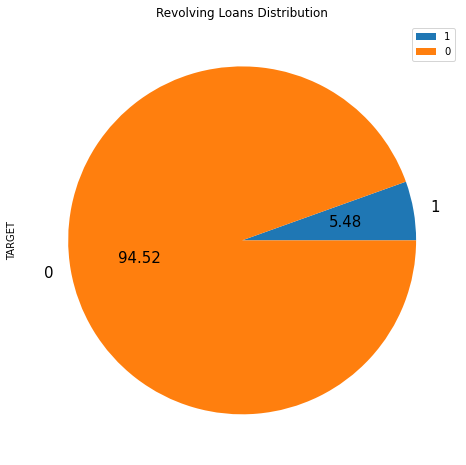

In [234]:
# Revolving Loans Distribution
revol_loans = application_train[application_train['NAME_CONTRACT_TYPE'] == 'Revolving loans']

revol_loans_target = revol_loans['TARGET']
r = Counter(revol_loans_target)

revol_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
revol_target.columns = ['TARGET']
revol_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Revolving Loans Distribution')

#### Distribution of Name Income Type

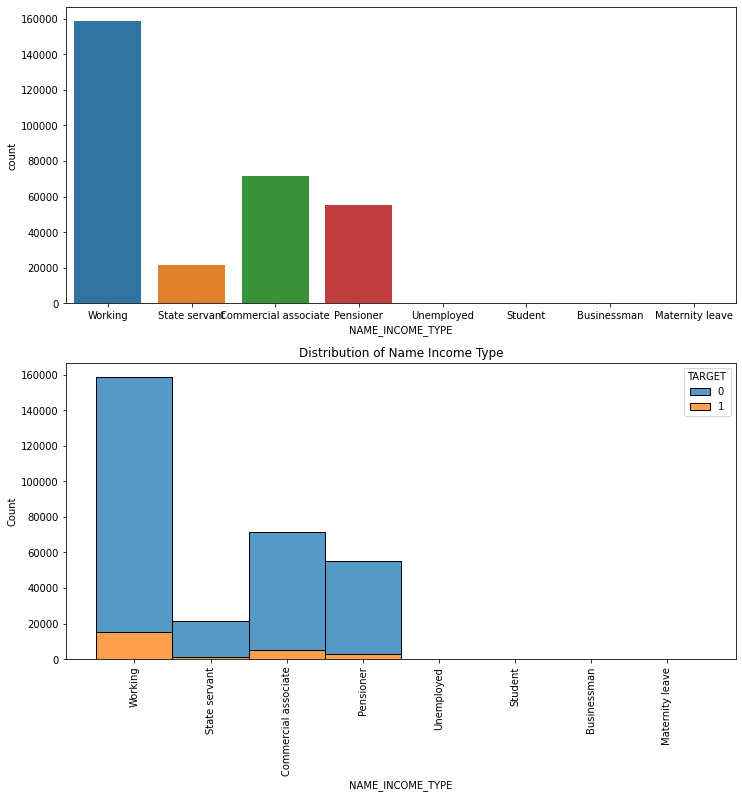

In [248]:
fig, ax = plt.subplots(2, figsize=(12,12))
plt.title('Distribution of Name Income Type')
sns.countplot(x=application_train['NAME_INCOME_TYPE'], ax=ax[0])
sns.histplot(application_train, x='NAME_INCOME_TYPE', hue='TARGET', multiple='stack', ax=ax[1])
plt.xticks(rotation=90)
plt.show()

<Figure size 864x576 with 0 Axes>

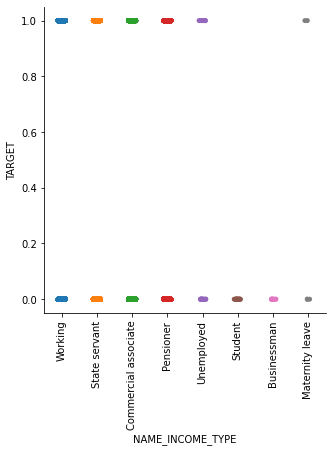

In [251]:
plt.figure(figsize=(12,8))
sns.catplot(data=application_train, x='NAME_INCOME_TYPE', y='TARGET')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Name Income Type Distribution'}, ylabel='NAME_INCOME_TYPE'>

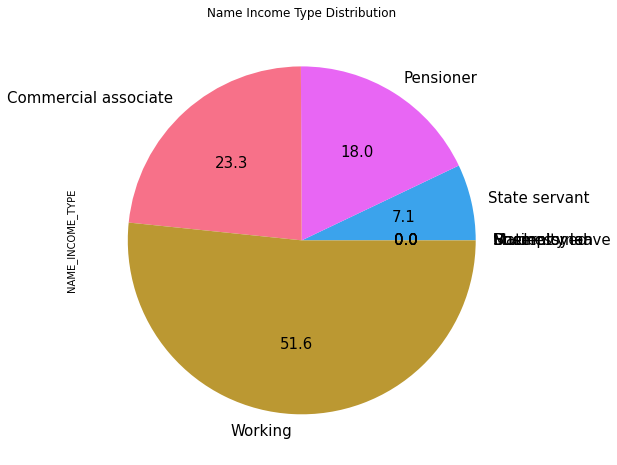

In [252]:
df = pd.concat([application_train['TARGET'], application_train['NAME_INCOME_TYPE']], axis=1)

name_income_target = df['NAME_INCOME_TYPE']
r = Counter(name_income_target)

colors = sns.color_palette('husl')

income_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
income_target.columns = ['NAME_INCOME_TYPE', ]
income_target.plot.pie(y = 'NAME_INCOME_TYPE', 
                       figsize=(8,8),
                       colors=colors,
                       fontsize = 15, autopct = '%.1f',
                       legend=False,
                       title = 'Name Income Type Distribution')

* Working

<AxesSubplot:title={'center':'Working Distribution'}, ylabel='TARGET'>

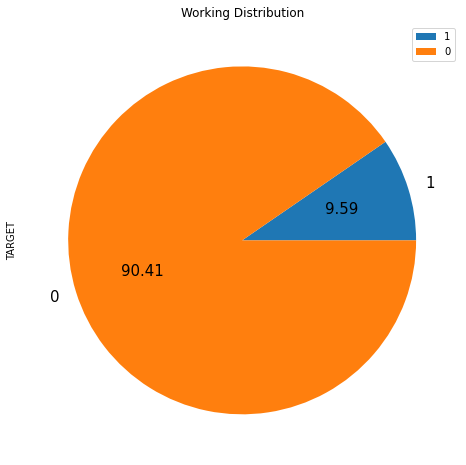

In [139]:
state_servant = application_train[application_train['NAME_INCOME_TYPE'] == 'Working']

state_servant_target = state_servant['TARGET']
r = Counter(state_servant_target)

state_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
state_target.columns = ['TARGET']
state_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Working Distribution')

* Commercial Associate

<AxesSubplot:title={'center':'Commercial Associate Distribution'}, ylabel='TARGET'>

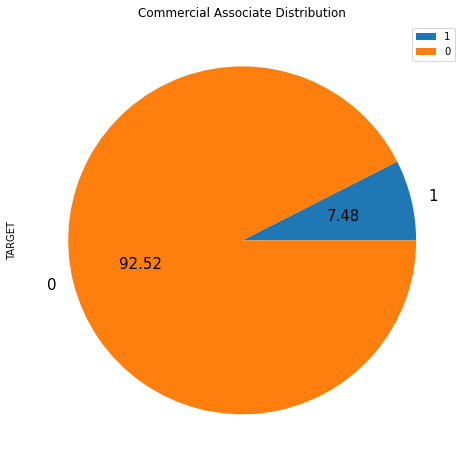

In [141]:
state_servant = application_train[application_train['NAME_INCOME_TYPE'] == 'Commercial associate']

state_servant_target = state_servant['TARGET']
r = Counter(state_servant_target)

state_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
state_target.columns = ['TARGET']
state_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Commercial Associate Distribution')

* Pensioner

<AxesSubplot:title={'center':'Pensioner Distribution'}, ylabel='TARGET'>

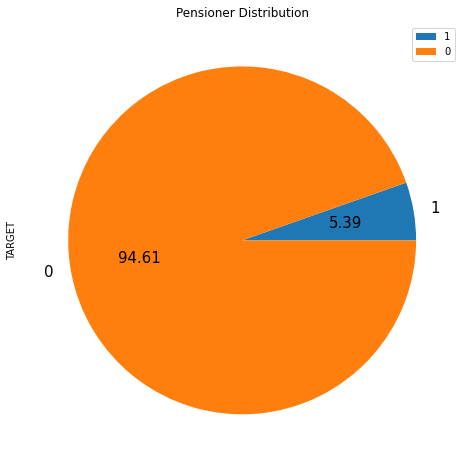

In [253]:
pensioner = application_train[application_train['NAME_INCOME_TYPE'] == 'Pensioner']

pensioner_target = pensioner['TARGET']
r = Counter(pensioner_target)

pensioners_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
pensioners_target.columns = ['TARGET']
pensioners_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Pensioner Distribution')

* State Servant

<AxesSubplot:title={'center':'State Servant Distribution'}, ylabel='TARGET'>

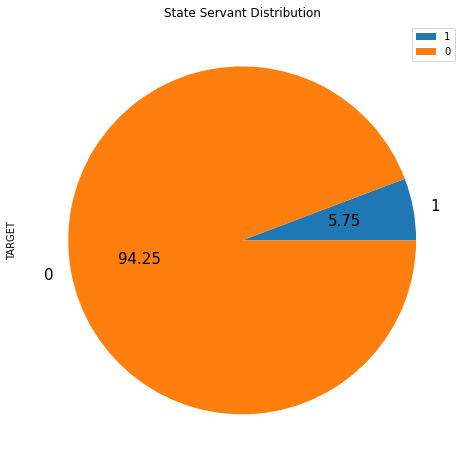

In [142]:
state_servant = application_train[application_train['NAME_INCOME_TYPE'] == 'State servant']

state_servant_target = state_servant['TARGET']
r = Counter(state_servant_target)

state_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
state_target.columns = ['TARGET']
state_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'State Servant Distribution')

#### Distribution of Name Education Type

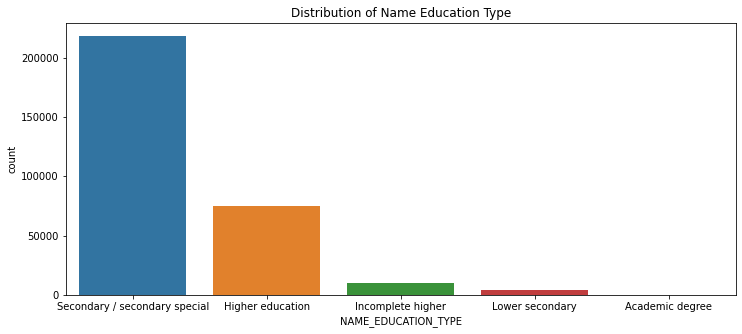

In [254]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Name Education Type')
sns.countplot(x=application_train['NAME_EDUCATION_TYPE'])
plt.show()

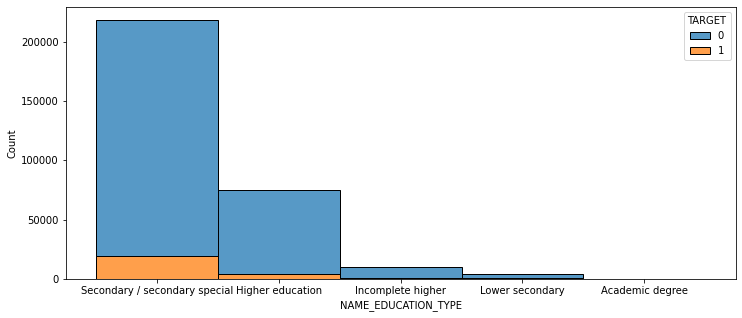

In [255]:
plt.figure(figsize=(12,5))
sns.histplot(application_train, x='NAME_EDUCATION_TYPE', hue='TARGET', multiple='stack')
plt.show()

#### Distribution of Name Family Status Type

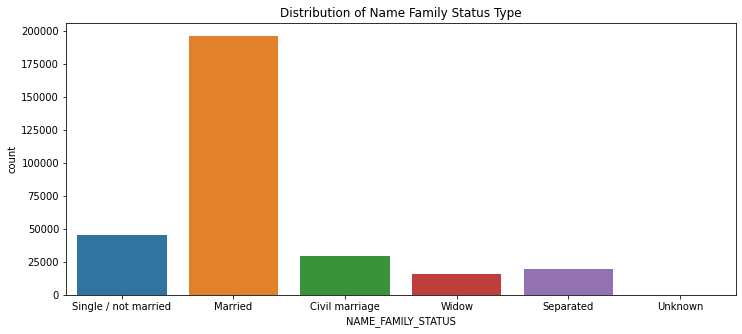

In [256]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Name Family Status Type')
sns.countplot(x=application_train['NAME_FAMILY_STATUS'])
plt.show()

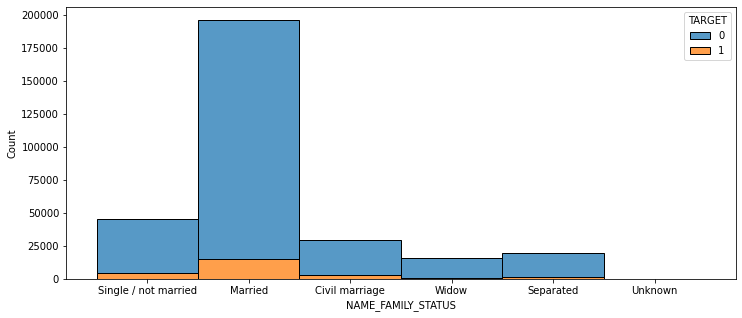

In [257]:
plt.figure(figsize=(12,5))
sns.histplot(application_train, x='NAME_FAMILY_STATUS', hue='TARGET', multiple='stack')
plt.show()

#### Distribution of Name Housing Type

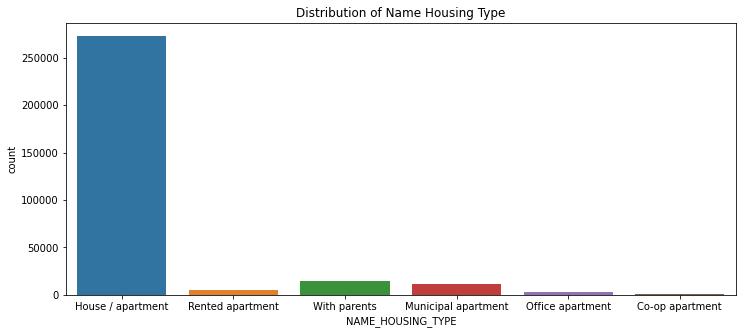

In [259]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Name Housing Type')
sns.countplot(x=application_train['NAME_HOUSING_TYPE'])
plt.show()

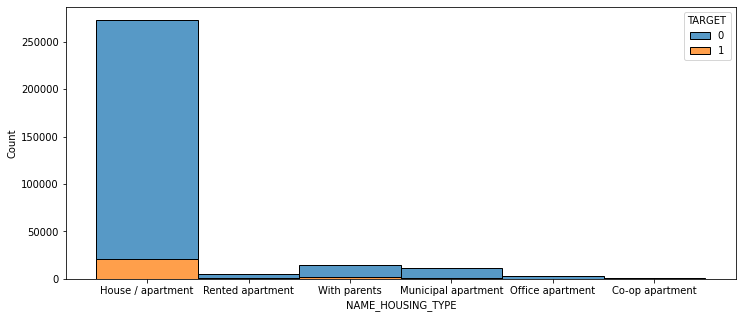

In [258]:
plt.figure(figsize=(12,5))
sns.histplot(application_train, x='NAME_HOUSING_TYPE', hue='TARGET', multiple='stack')
plt.show()

#### Distribution of Occupation Type

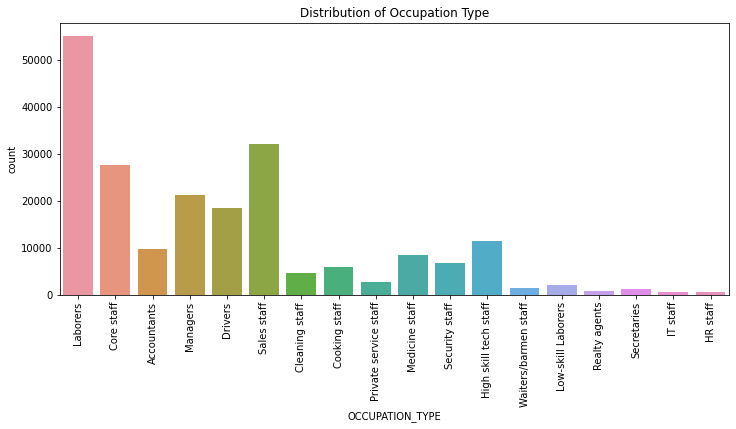

In [263]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Occupation Type')
plt.xticks(rotation=90)
sns.countplot(x=application_train['OCCUPATION_TYPE'])
plt.show()

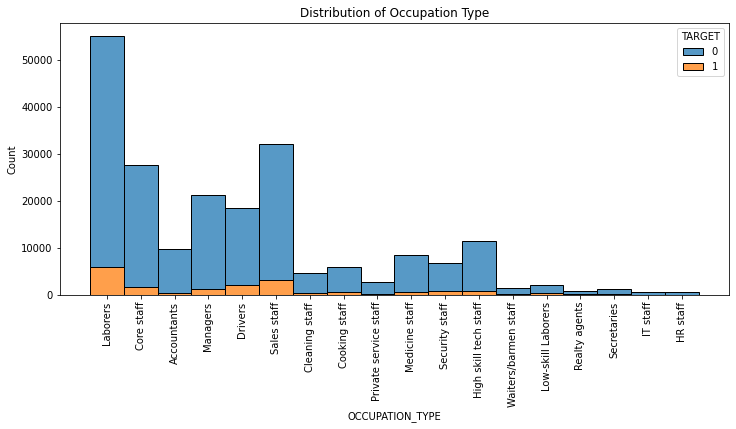

In [308]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.title('Distribution of Occupation Type')
sns.histplot(application_train, x='OCCUPATION_TYPE', hue='TARGET', multiple='stack')
plt.show()

* Laborers

<AxesSubplot:title={'center':'Laborers Distribution'}, ylabel='TARGET'>

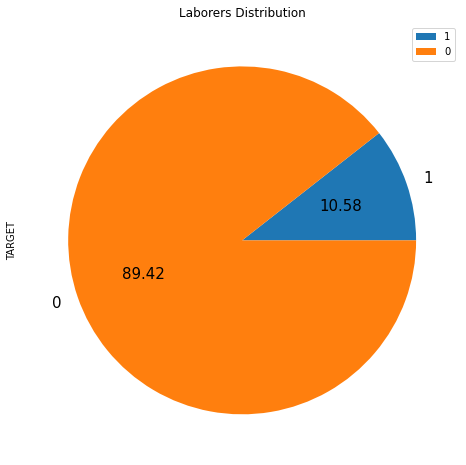

In [198]:
laborers = application_train[application_train['OCCUPATION_TYPE'] == 'Laborers']

laborers_target = laborers['TARGET']
r = Counter(laborers_target)

labor_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
labor_target.columns = ['TARGET']
labor_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Laborers Distribution')

* Sales Staff

<AxesSubplot:title={'center':'Sales Staff Distribution'}, ylabel='TARGET'>

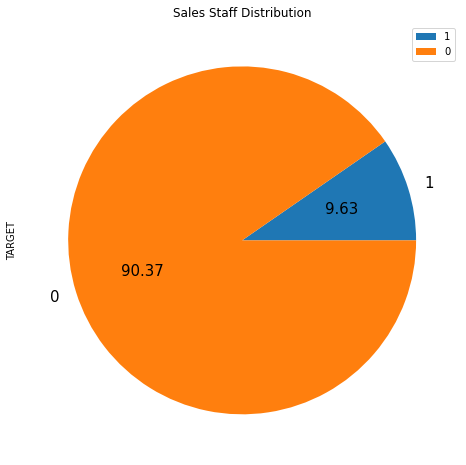

In [265]:
sales_staff = application_train[application_train['OCCUPATION_TYPE'] == 'Sales staff']

sales_staff_target = sales_staff['TARGET']
r = Counter(sales_staff_target)

sales_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
sales_target.columns = ['TARGET']
sales_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Sales Staff Distribution')

* Core Staff

<AxesSubplot:title={'center':'Core Staff Distribution'}, ylabel='TARGET'>

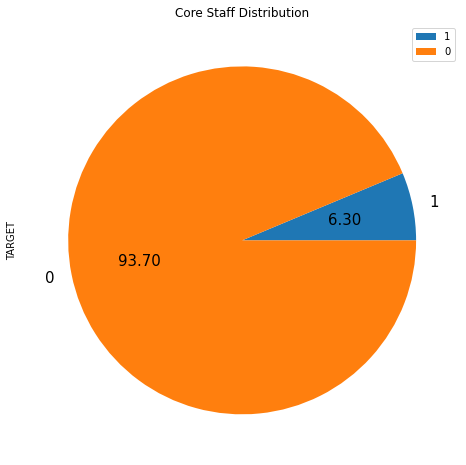

In [266]:
core_staff = application_train[application_train['OCCUPATION_TYPE'] == 'Core staff']

core_staff_target = core_staff['TARGET']
r = Counter(core_staff_target)

core_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
core_target.columns = ['TARGET']
core_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Core Staff Distribution')

* Accountant Distribution

<AxesSubplot:title={'center':'Accountants Distribution'}, ylabel='TARGET'>

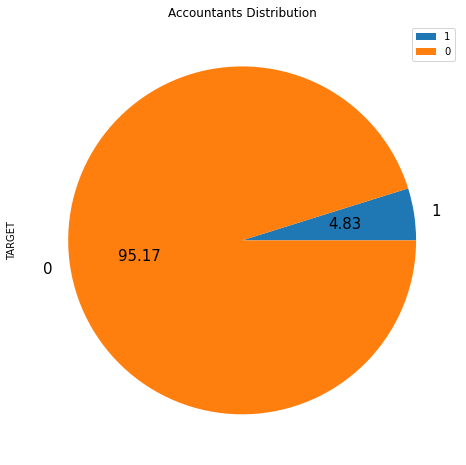

In [267]:
accountants = application_train[application_train['OCCUPATION_TYPE'] == 'Accountants']

accountants_target = accountants['TARGET']
r = Counter(accountants_target)

accountant_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
accountant_target.columns = ['TARGET']
accountant_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Accountants Distribution')

#### Distribution of Organization Type

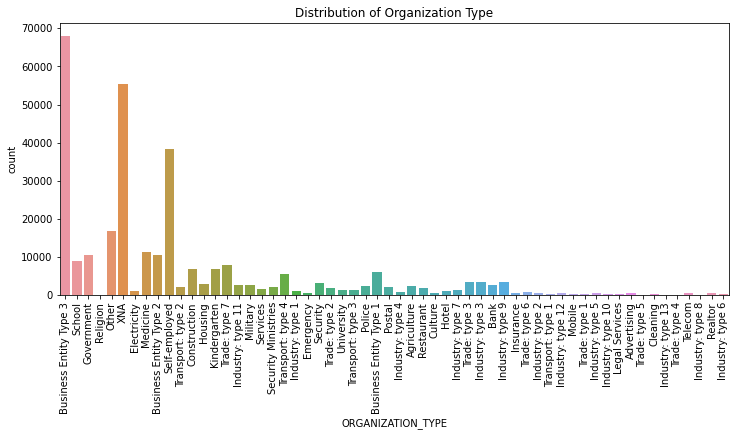

In [270]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.title('Distribution of Organization Type')
sns.countplot(x=application_train['ORGANIZATION_TYPE'])
plt.show()

<AxesSubplot:xlabel='ORGANIZATION_TYPE', ylabel='Count'>

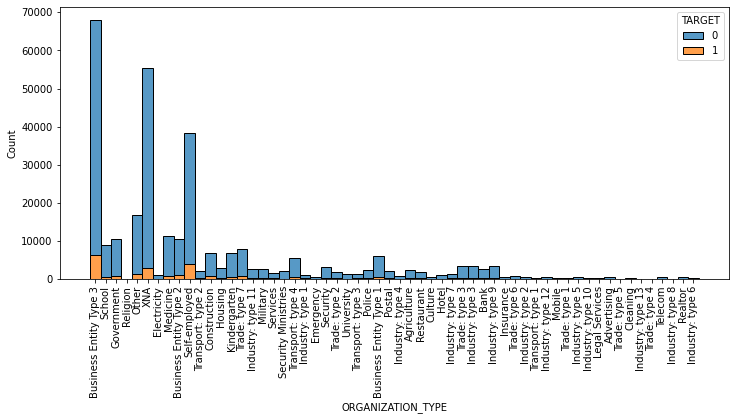

In [159]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.histplot(application_train, x='ORGANIZATION_TYPE', hue='TARGET', multiple='stack')

#### Distribution of Region Rating Client

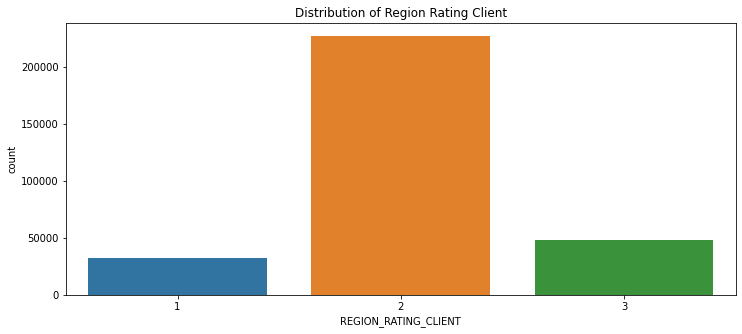

In [275]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Region Rating Client')
sns.countplot(x=application_train['REGION_RATING_CLIENT'])
plt.show()

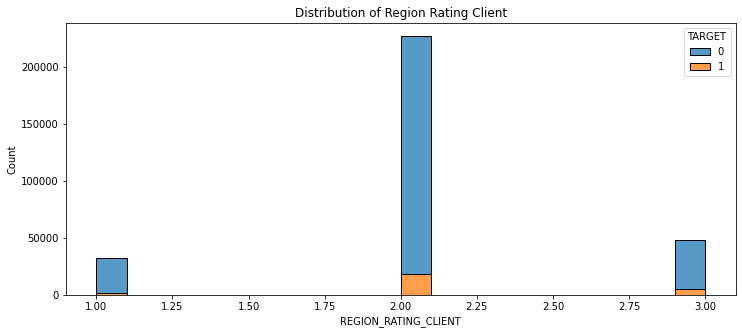

In [307]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Region Rating Client')
sns.histplot(application_train, x='REGION_RATING_CLIENT', hue='TARGET', multiple='stack')
plt.show()

<AxesSubplot:title={'center':'Region Rating Client Distribution'}, ylabel='REGION_RATING_CLIENT'>

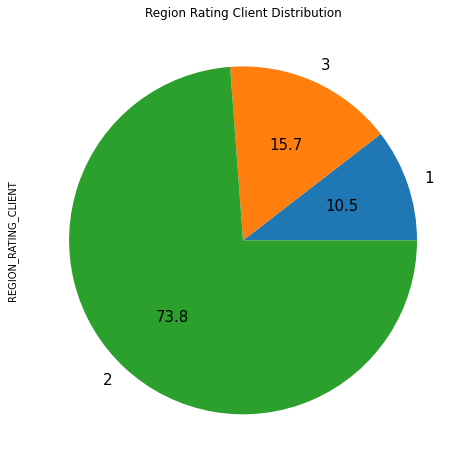

In [295]:
df = pd.concat([application_train['TARGET'], application_train['REGION_RATING_CLIENT']], axis=1)

region_rating_target = df['REGION_RATING_CLIENT']
r = Counter(region_rating_target)


region_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
region_target.columns = ['REGION_RATING_CLIENT', ]
region_target.plot.pie(y = 'REGION_RATING_CLIENT', 
                       figsize=(8,8),
                       fontsize = 15, autopct = '%.1f',
                       legend=False,
                       title = 'Region Rating Client Distribution')

* Region Rating Client 1

<AxesSubplot:title={'center':'Region Rating Client 1 Distribution'}, ylabel='TARGET'>

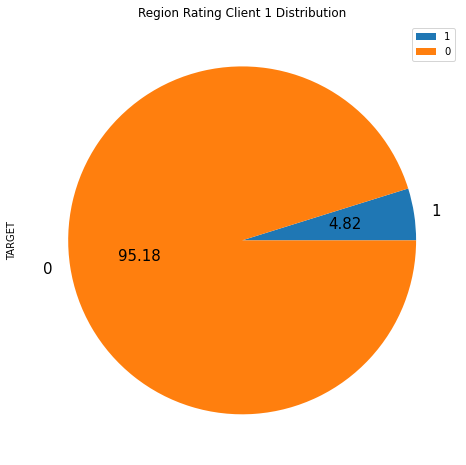

In [281]:
region_1 = application_train[application_train['REGION_RATING_CLIENT'] == 1]

region_target = region_1['TARGET']
r = Counter(region_target)

regions_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
regions_target.columns = ['TARGET']
regions_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Region Rating Client 1 Distribution')

* Region Rating Client 2

<AxesSubplot:title={'center':'Region Rating Client 2 Distribution'}, ylabel='TARGET'>

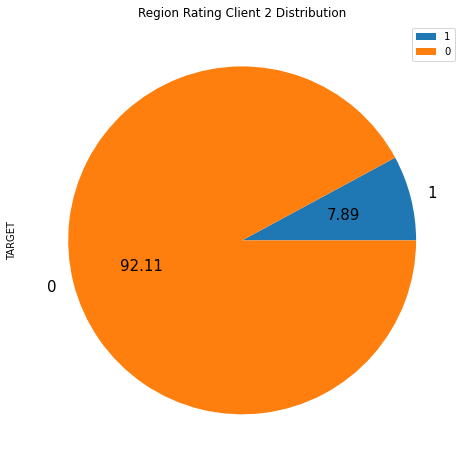

In [282]:
region_2 = application_train[application_train['REGION_RATING_CLIENT'] == 2]

region_target = region_2['TARGET']
r = Counter(region_target)

regions_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
regions_target.columns = ['TARGET']
regions_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Region Rating Client 2 Distribution')

* Region Rating Client 3

<AxesSubplot:title={'center':'Region Rating Client 3 Distribution'}, ylabel='TARGET'>

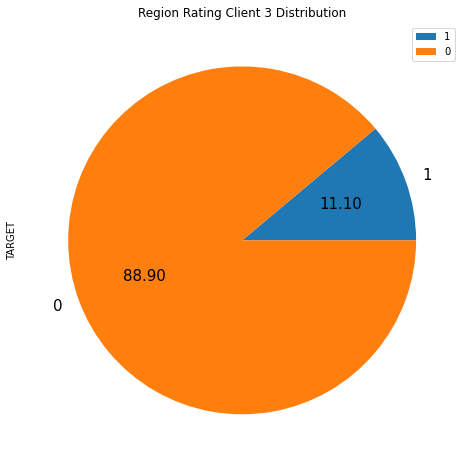

In [292]:
region_3 = application_train[application_train['REGION_RATING_CLIENT'] == 3]

region_target = region_3['TARGET']
r = Counter(region_target)

regions_target = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
regions_target.columns = ['TARGET']
regions_target.plot.pie(y = 'TARGET', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 title = 'Region Rating Client 3 Distribution')

#### Distribution of Days Application Process Start

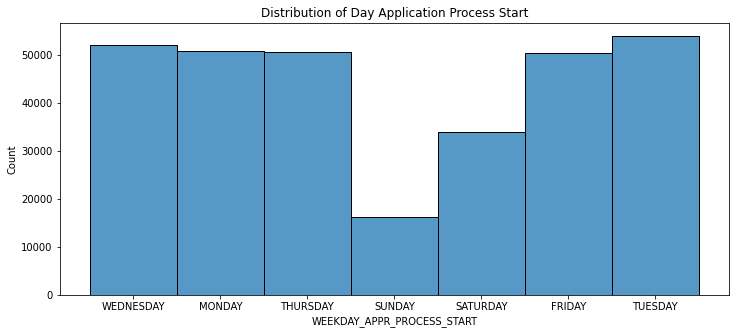

In [285]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Day Application Process Start')
sns.histplot(x=application_train['WEEKDAY_APPR_PROCESS_START'])
plt.show()

#### Distribution of Hours Application Process Start

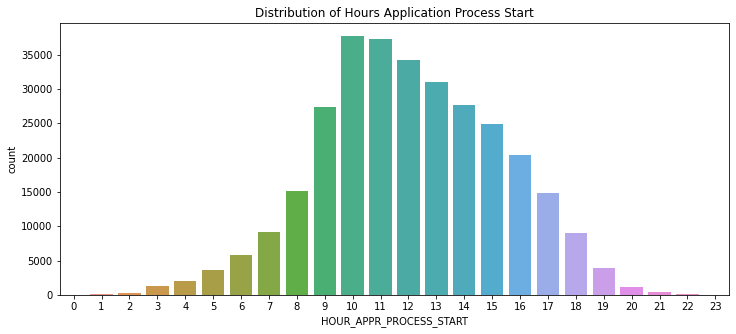

In [296]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Hours Application Process Start')
sns.countplot(x=application_train['HOUR_APPR_PROCESS_START'])
plt.show()

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='Count'>

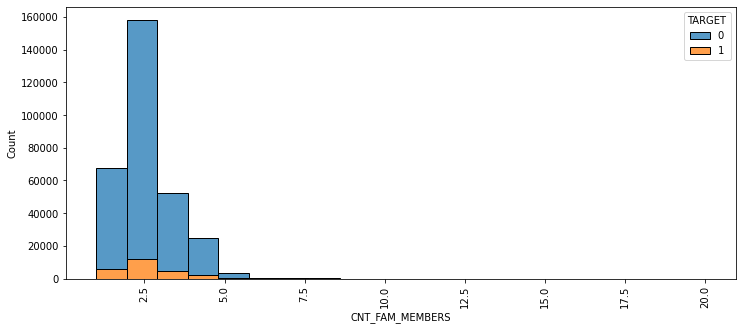

In [306]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.histplot(data=application_train, x='CNT_FAM_MEMBERS', hue='TARGET', multiple='stack', bins=20)

# Logistic Regression

In [15]:
train_data = pd.read_csv('datasets/application_train.csv')
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
train_data.shape

(307511, 122)

### One-Hot Encoding

In [17]:
# one-hot encoding of categorical variables
train_data = pd.get_dummies(train_data)
train_data.shape

(307511, 246)

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

X = train_data.drop(['TARGET'], axis=1)
y = train_data.TARGET

# X = os_data_X
# y = os_data_y

# median imputation of missing values
imputer = SimpleImputer(strategy='median')

# scale each feature to 0-1
scaler = MinMaxScaler(feature_range=(0,1))

# fit the training data
imputer.fit(X)

# transform training data
X = imputer.transform(X)

#  repeat with the scaler
scaler.fit(X)
X = scaler.transform(X)

print('Training data shape: ', X.shape)

Training data shape:  (307511, 245)


In [19]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, C=0.0001, class_weight='balanced')

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

### Confusion Matrix

In [21]:
# model evaluation using confusion matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[54754, 30160],
       [ 2508,  4832]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

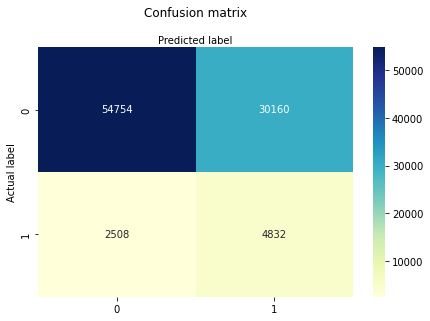

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [10]:
from sklearn.metrics import classification_report
target_names = ['without difficult payment', 'with difficult payment']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

without difficult payment       0.96      0.64      0.77     84914
   with difficult payment       0.14      0.66      0.23      7340

                 accuracy                           0.65     92254
                macro avg       0.55      0.65      0.50     92254
             weighted avg       0.89      0.65      0.73     92254



### ROC Curve

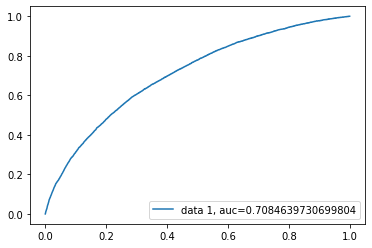

In [11]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Feature Importance

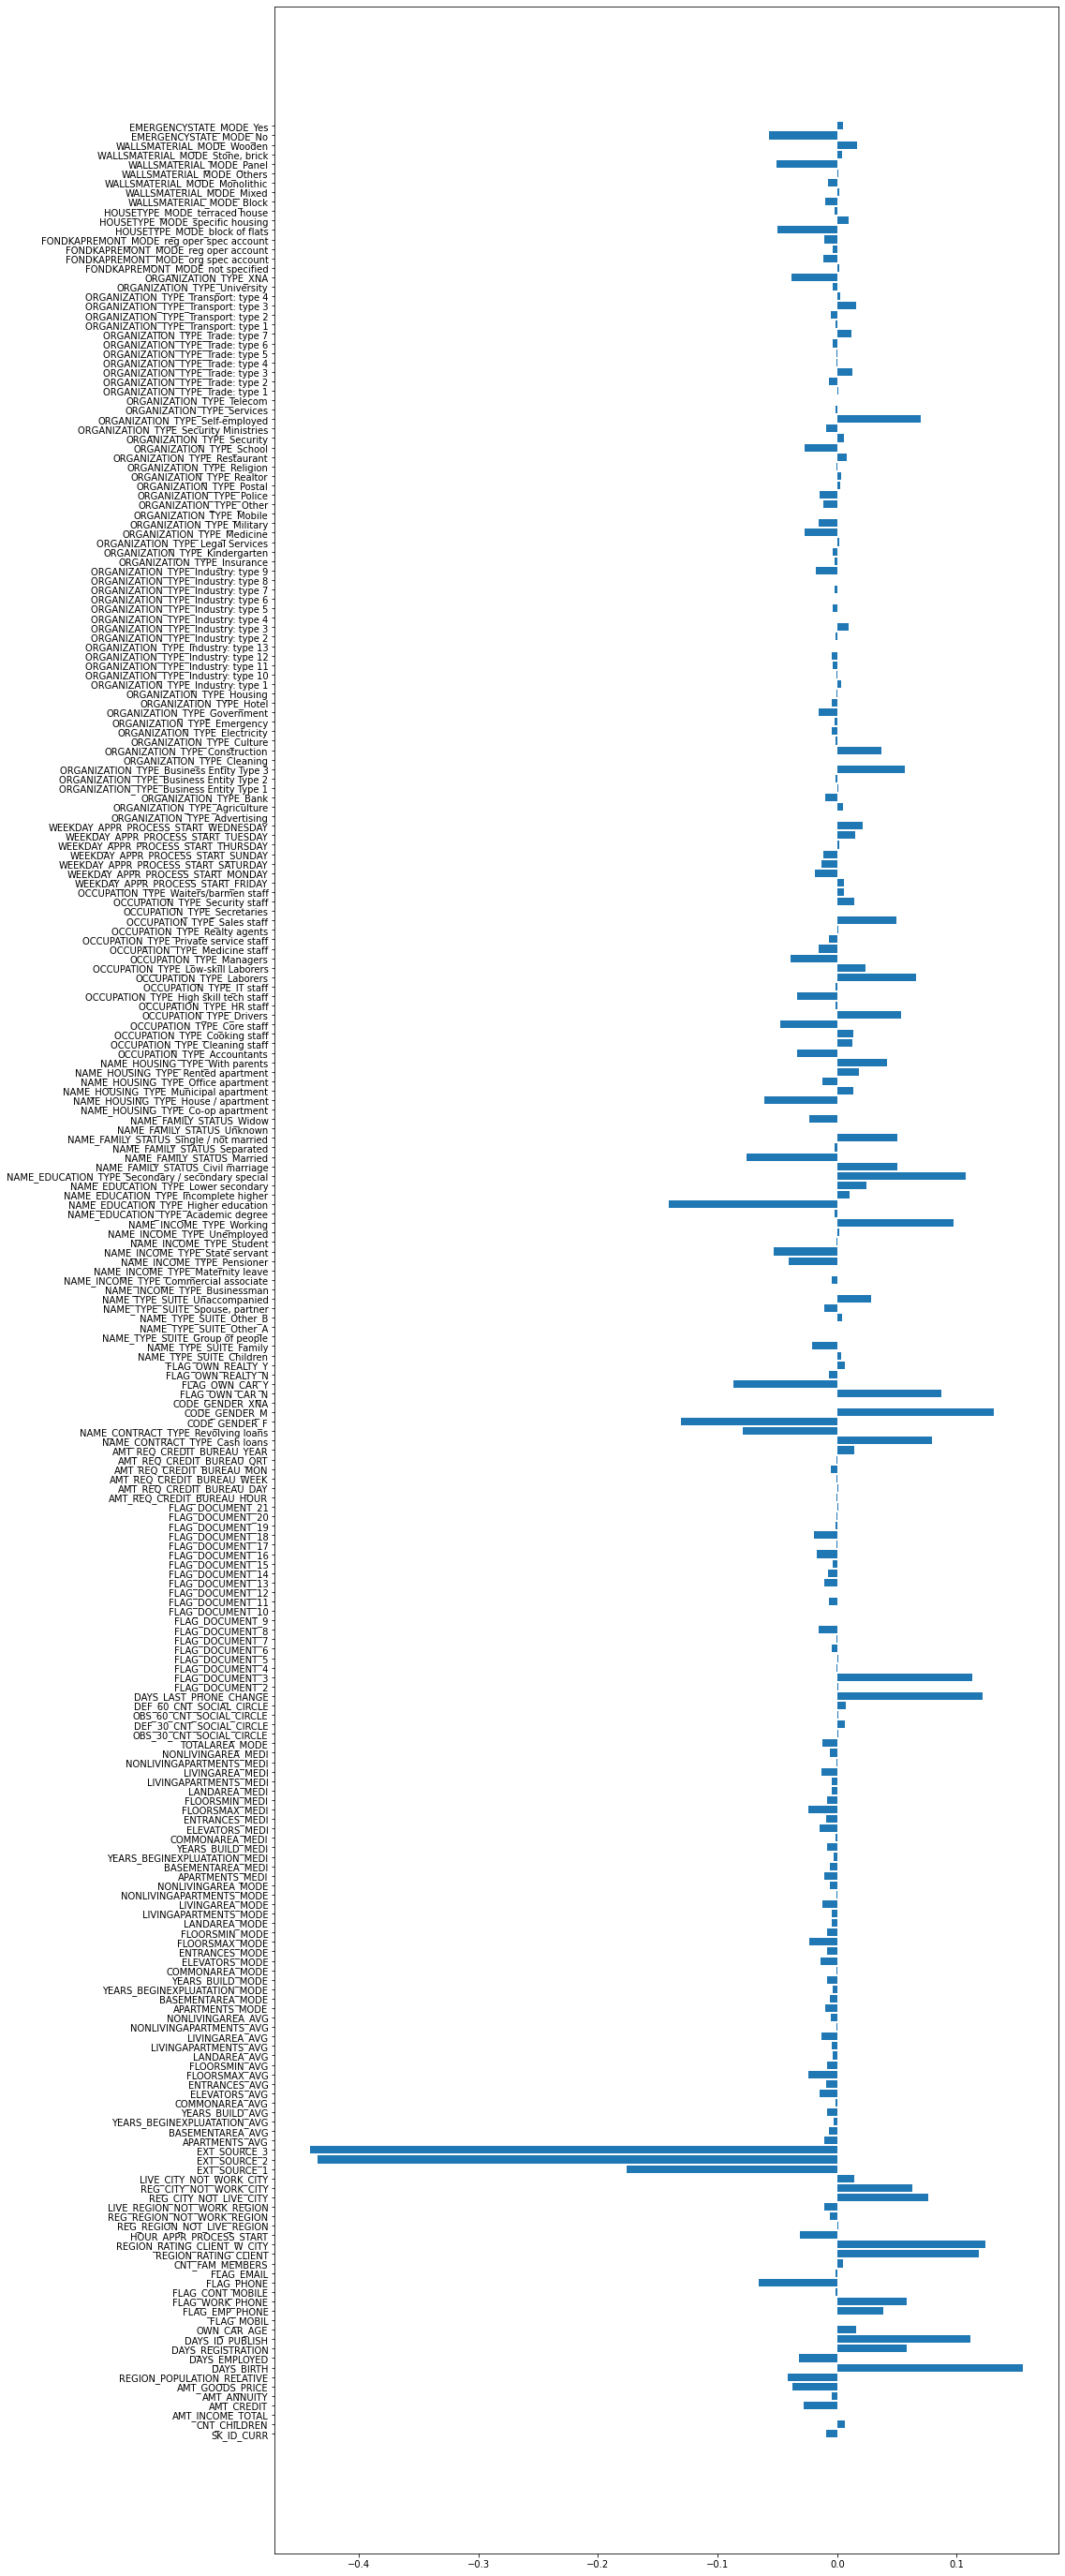

In [13]:
# getting feature importance
importance = logreg.coef_[0]
X = train_data.drop(['TARGET'], axis=1)
fig, ax = plt.subplots(figsize=(15,50))
plt.barh(X.columns, importance)
plt.show()

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=50, 
                                       verbose=1, n_jobs=-1)

In [50]:
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


In [51]:
from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9205237713269885


In [52]:
from sklearn.metrics import classification_report

target_names = ['without difficult payment', 'with difficult payment']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

without difficult payment       0.92      1.00      0.96     84914
   with difficult payment       0.75      0.00      0.00      7340

                 accuracy                           0.92     92254
                macro avg       0.84      0.50      0.48     92254
             weighted avg       0.91      0.92      0.88     92254



In [53]:
# model evaluation using confusion matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[84910,     4],
       [ 7328,    12]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

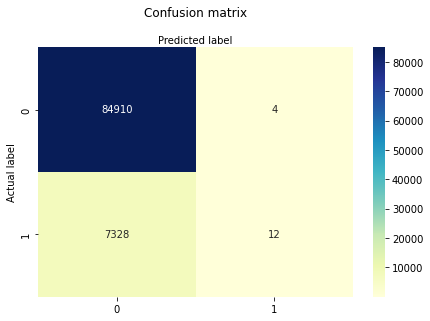

In [54]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
model = Sequential()
model.add(Dense(368, input_shape=(245,), activation='relu'))
model.add(Dense(245, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
30752/30752 [==============================] - 101s 3ms/step - loss: nan - accuracy: 0.9193
Epoch 2/10
30752/30752 [==============================] - 98s 3ms/step - loss: nan - accuracy: 0.9193
Epoch 3/10
30752/30752 [==============================] - 98s 3ms/step - loss: nan - accuracy: 0.9193
Epoch 4/10
30752/30752 [==============================] - 101s 3ms/step - loss: nan - accuracy: 0.9193
Epoch 5/10
30752/30752 [==============================] - 99s 3ms/step - loss: nan - accuracy: 0.9193
Epoch 6/10
30752/30752 [==============================] - 98s 3ms/step - loss: nan - accuracy: 0.9193
Epoch 7/10
30752/30752 [==============================] - 98s 3ms/step - loss: nan - accuracy: 0.9193
Epoch 8/10
30752/30752 [==============================] - 101s 3ms/step - loss: nan - accuracy: 0.9193
Epoch 9/10
30752/30752 [==============================] - 109s 4ms/step - loss: nan - accuracy: 0.9193
Epoch 10/10
30752/30752 [==============================] - 103s 3ms/step - los

In [42]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

9610/9610 [==============================] - 23s 2ms/step - loss: nan - accuracy: 0.9193
Accuracy: 91.93
